# Imports

In [195]:
import json
import random
import networkx as nx
from matplotlib import pyplot as plt
from networkx.readwrite import json_graph

COLOR_BG = "#a8dadc"
COLOR_FG = "#457b9d"
SIZE_BG_NODES = 800
SIZE_FG_NODES = 2400
EDGE_BG_WEIGHT = 4
EDGE_FG_WEIGHT = 24
MATRIX_SIDE = 10
NO_FG_NODES = 20
FIG_SIZE = (12, 12)

# Activity 2

## 2.1 Sub-activity: Graph creation

### Task 1

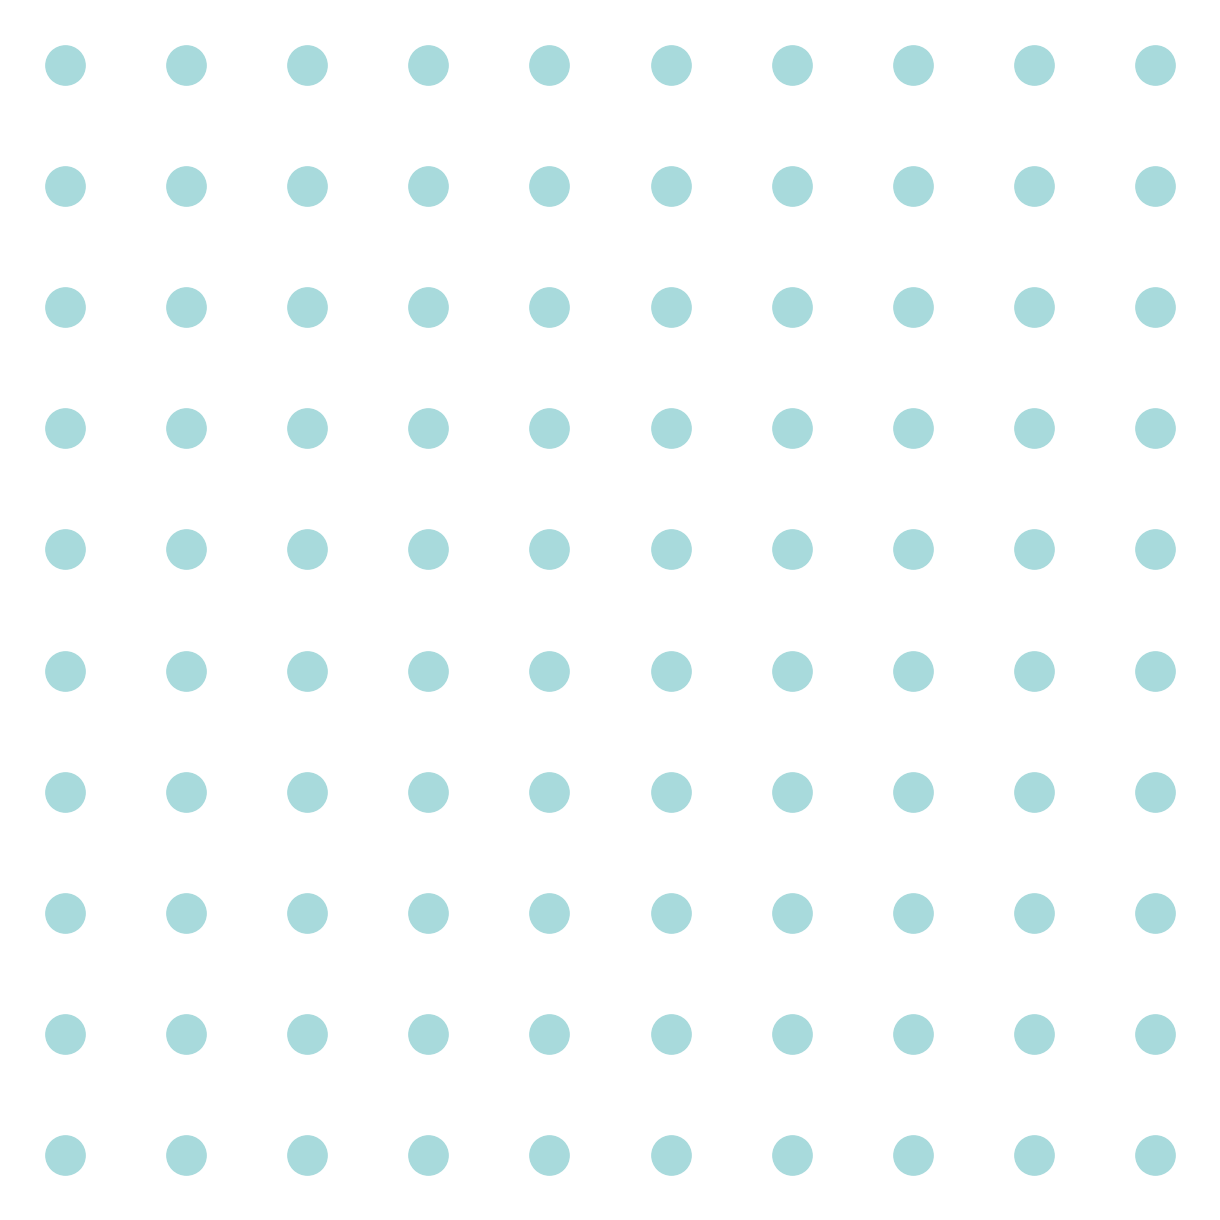

In [196]:
# Create a 2D grid graph
G = nx.grid_2d_graph(MATRIX_SIDE, MATRIX_SIDE)

# Get the positions of the nodes
pos = {(x,y):(x,y) for x in range(MATRIX_SIDE) for y in range(MATRIX_SIDE)}

# Remove the edges between the nodes
G.remove_edges_from(G.edges())

# Set the figure size
plt.figure(figsize = FIG_SIZE)

# Draw the grid graph
nx.draw(G, pos=pos, node_color = COLOR_BG, node_size = SIZE_BG_NODES)

### Task 2

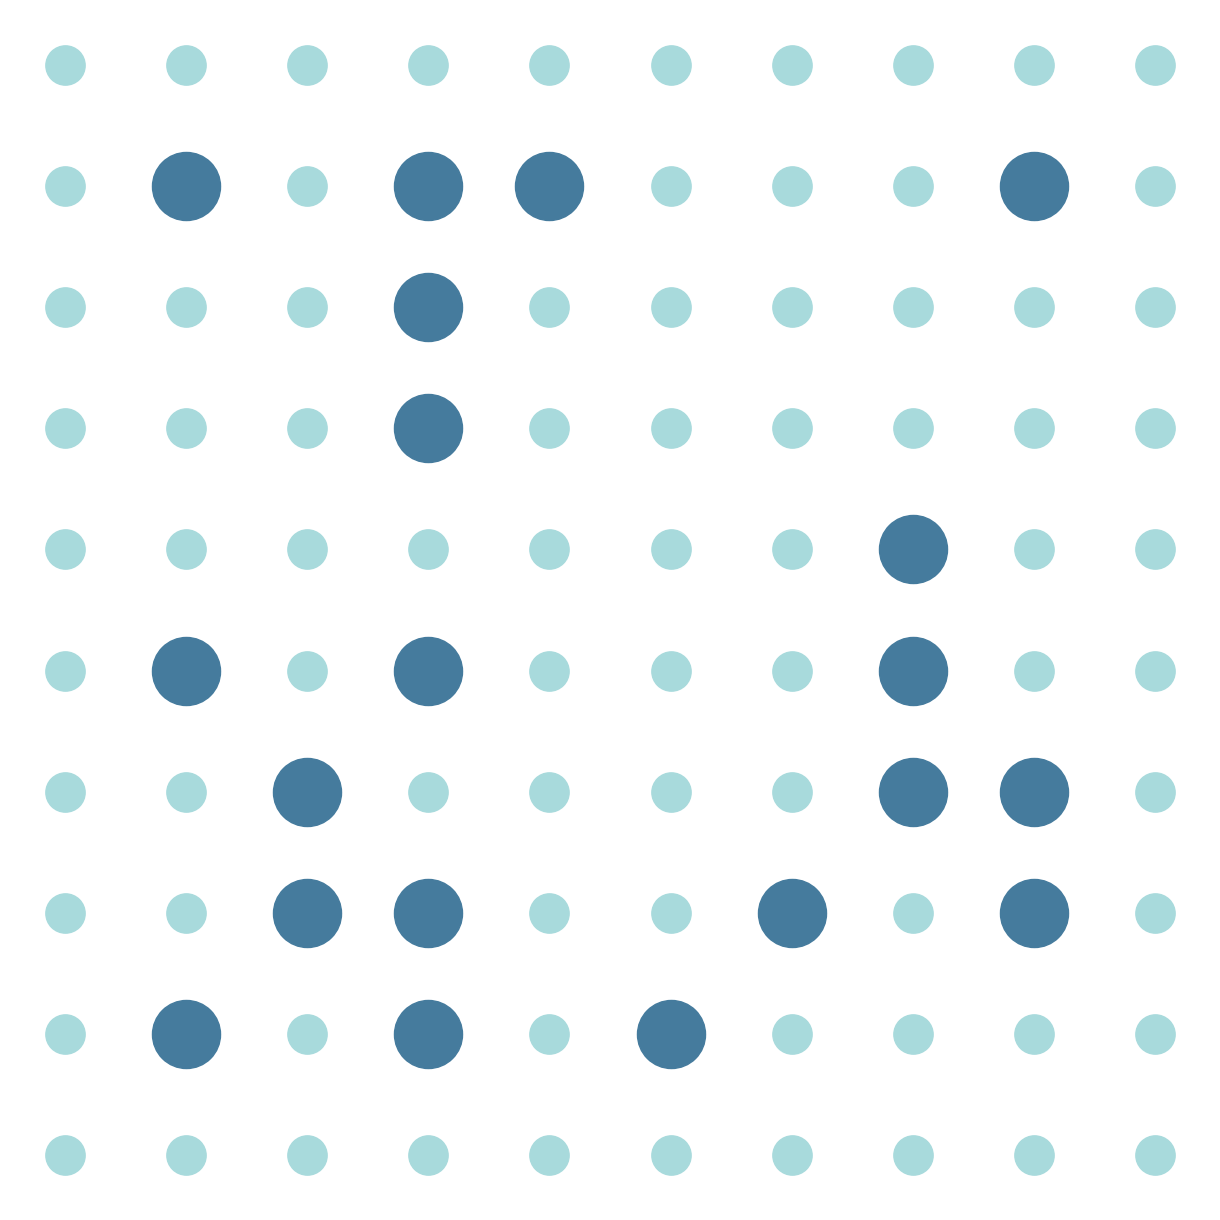

In [197]:

# Get the possible positions of the foreground nodes
possible_positions = {(x,y):(x,y) for x in range(1, MATRIX_SIDE-1) for y in range(1, MATRIX_SIDE-1)}

# Choose the positions ramdomly by positions' keys
chosen_positions_keys = random.sample(list(possible_positions.keys()), NO_FG_NODES)

# Get the chosen positions
chosen_positions = [possible_positions[key] for key in chosen_positions_keys]

# Draw the foreground nodes
plt.figure(figsize = FIG_SIZE)
nx.draw(G, pos=pos, node_color = COLOR_BG, node_size = SIZE_BG_NODES)
nx.draw(G, pos=pos, nodelist=chosen_positions, node_color = COLOR_FG, node_size = SIZE_FG_NODES)

### Task 3

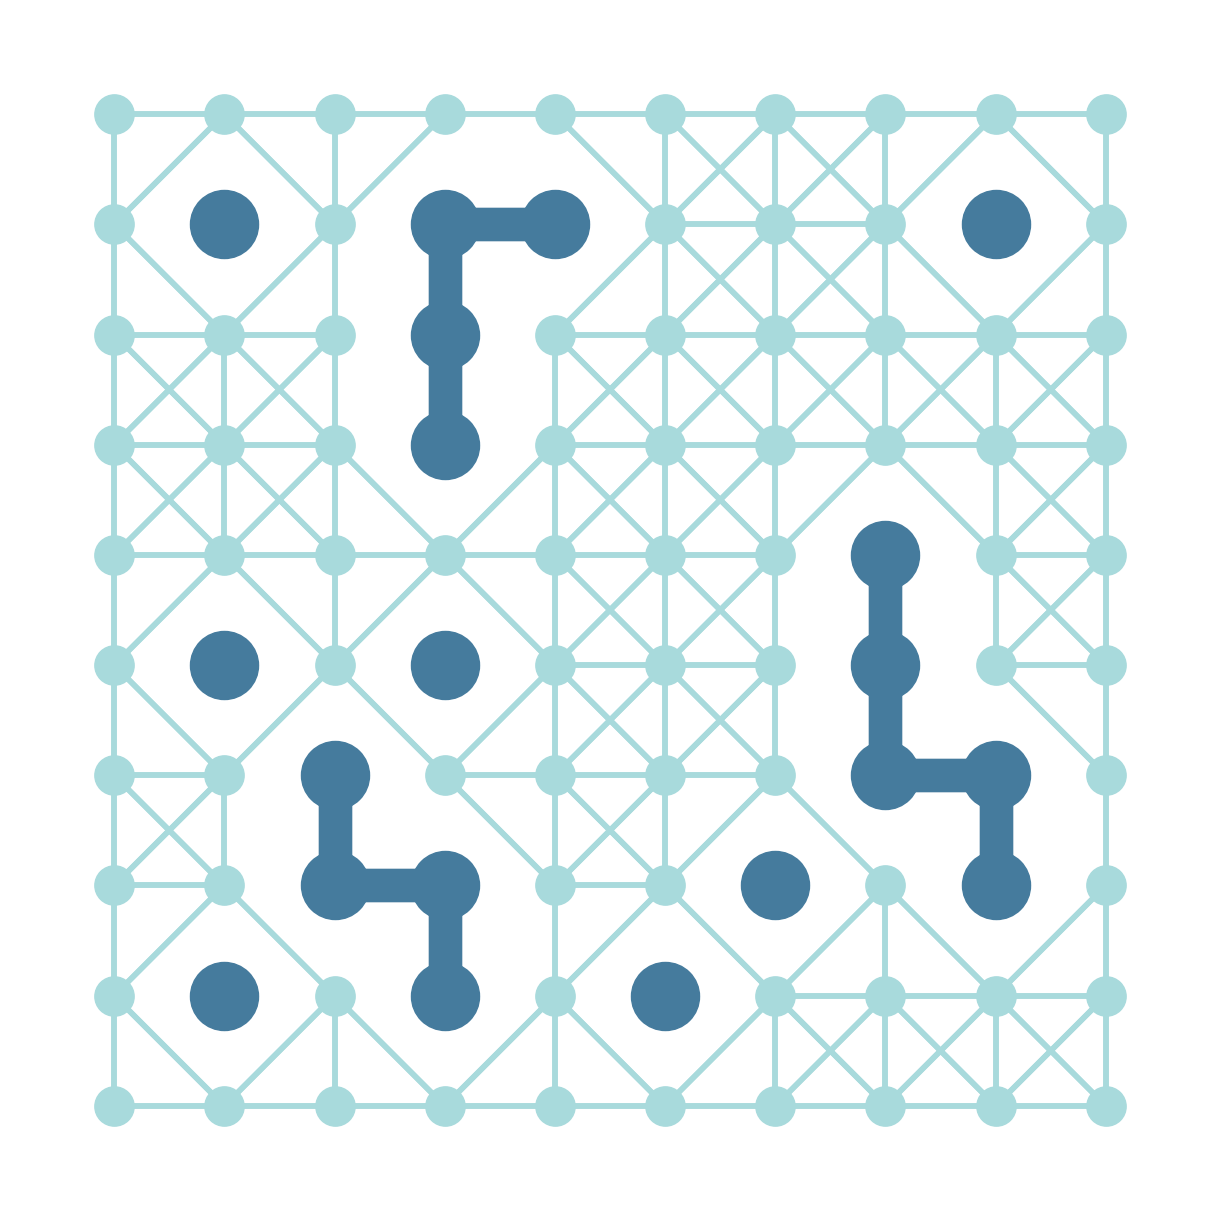

In [198]:
G_nodes = [node for node in G.nodes()]
remained_node = [G_node for G_node in G_nodes if G_node not in chosen_positions]

FG_edges = []
BG_edges = []

for i in range(-1,2):
    for j in range(-1,2):
        if i == 0 and j == 0:
            continue
        else:
            for node in remained_node:
                if (node[0]+i,node[1]+j) not in chosen_positions and (node[0]+i,node[1]+j) in G_nodes:
                    G.add_edge(node, (node[0]+i,node[1]+j), weight = EDGE_BG_WEIGHT)
                    BG_edges.append((node, (node[0]+i,node[1]+j)))

            for node in chosen_positions:
                if (node[0]+i,node[1]+j) not in remained_node:
                    if i == 0 and j == 1:
                        G.add_edge(node, (node[0]+i,node[1]+j), weight = EDGE_FG_WEIGHT)
                        FG_edges.append((node, (node[0]+i,node[1]+j)))
                    elif i == 0 and j == -1:
                        G.add_edge(node, (node[0]+i,node[1]+j), weight = EDGE_FG_WEIGHT)
                        FG_edges.append((node, (node[0]+i,node[1]+j)))
                    elif i == 1 and j == 0:
                        G.add_edge(node, (node[0]+i,node[1]+j), weight = EDGE_FG_WEIGHT)
                        FG_edges.append((node, (node[0]+i,node[1]+j)))
                    elif i == -1 and j == 0:
                        G.add_edge(node, (node[0]+i,node[1]+j), weight = EDGE_FG_WEIGHT)
                        FG_edges.append((node, (node[0]+i,node[1]+j)))

plt.figure(figsize = FIG_SIZE)
nx.draw(G, pos=pos, node_color = COLOR_BG, node_size = SIZE_BG_NODES)
nx.draw(G, pos=pos, nodelist=chosen_positions, node_color = COLOR_FG, node_size = SIZE_FG_NODES)
nx.draw_networkx_edges(G, pos=pos, edgelist=FG_edges, edge_color = COLOR_FG, width = EDGE_FG_WEIGHT)
nx.draw_networkx_edges(G, pos=pos, edgelist=BG_edges, edge_color = COLOR_BG, width = EDGE_BG_WEIGHT)


## 2.2 Sub-activity: Graph manipulation and output

### Task 4

In [199]:
print("The infomation about the graph:", nx.info(G), "\n")
print("The density of the graph is:", nx.density(G), "\n")
print("The degree centrality of the graph is:", nx.degree_centrality(G))

The infomation about the graph: Graph with 100 nodes and 212 edges 

The density of the graph is: 0.042828282828282827 

The degree centrality of the graph is: {(0, 0): 0.020202020202020204, (0, 1): 0.04040404040404041, (0, 2): 0.04040404040404041, (0, 3): 0.04040404040404041, (0, 4): 0.04040404040404041, (0, 5): 0.04040404040404041, (0, 6): 0.05050505050505051, (0, 7): 0.04040404040404041, (0, 8): 0.04040404040404041, (0, 9): 0.020202020202020204, (1, 0): 0.04040404040404041, (1, 1): 0.0, (1, 2): 0.05050505050505051, (1, 3): 0.05050505050505051, (1, 4): 0.0, (1, 5): 0.07070707070707072, (1, 6): 0.08080808080808081, (1, 7): 0.07070707070707072, (1, 8): 0.0, (1, 9): 0.04040404040404041, (2, 0): 0.030303030303030304, (2, 1): 0.04040404040404041, (2, 2): 0.020202020202020204, (2, 3): 0.010101010101010102, (2, 4): 0.05050505050505051, (2, 5): 0.05050505050505051, (2, 6): 0.06060606060606061, (2, 7): 0.04040404040404041, (2, 8): 0.05050505050505051, (2, 9): 0.030303030303030304, (3, 0): 0.0

/var/folders/dn/rwz32gqj5951m0mt9y7smnn80000gn/T/ipykernel_84082/1329196494.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print("The infomation about the graph:", nx.info(G), "\n")


### Task 5

In [200]:
# Save the graph as a JSON file named "graph.json" to the current directory
with open ("graph.json", "w") as f:
    json.dump(json_graph.node_link_data(G), f, indent = 4)